# Contexte

#### Vous êtes data scientist/data analyst dans une banque et votre entreprise souhaite analyser l'efficacité des campagnes de marketing direct basées sur les appels téléphoniques.

L'objectif est de déterminer si ces campagnes influencent positivement la souscription des clients à des dépôts à terme.

Pour cela, vous disposez de quatre ensembles de données détaillant les interactions avec les clients sur une période allant de mai 2008 à novembre 2010.

### Objectif
Votre mission consiste à effectuer une analyse exploratoire des données pour identifier les tendances, les comportements des clients, et d'autres insights pertinents qui peuvent aider la banque à optimiser ses futures campagnes de marketing.

### Jeu de Données
Vous disposez du jeu de données donnee_marketing_banque.csv, qui comprend 41 188 exemples avec 20 variables, couvrant la période de mai 2008 à novembre 2010. Ces données incluent des informations sur les appels effectués, les caractéristiques des clients, et la réponse finale du client (souscription ou non à un dépôt à terme).

## Importation et nettoyage des données

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("donnees_marketing_banque.csv", sep = ";")
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,id1,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,id2,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,id3,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,id4,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,id5,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,id45207,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,id45208,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,id45209,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,id45210,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# 1 question: est la nature de ma variable ?
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [4]:
# Description rapide de la base de données
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45206.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.931477,1362.403707,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623372,3044.906741,8.322476,257.527812,3.098021,100.128746,2.303441
min,10.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Ajout des variables qualitatives 
# Description rapide de la base de données
df.describe(include = "all")

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211.000000,45211,45211,45211,45211,45206.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,45211,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,id1,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,1,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,NaN,40.931477,NaN,NaN,NaN,NaN,1362.403707,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,NaN,10.623372,NaN,NaN,NaN,NaN,3044.906741,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,NaN,10.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
df.isnull().mean()

id           0.000000
age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000111
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
y            0.000000
dtype: float64

In [7]:
# Conserver uniquement les clients majeurs
df_majeur = df[df["age"]>=18]
df_majeur.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45198.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,40.936133,1362.631997,15.808331,258.168816,2.764153,40.205119,0.580426
std,10.618494,3045.126997,8.321971,257.548471,3.098206,100.136106,2.303632
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

# Visualisation des Variables Quantitatives Univariées

Lors de l'analyse de variables quantitatives univariées, 
il est essentiel de choisir le bon type 
de graphique pour une interprétation correcte des données. 
Voici quelques types de graphiques fréquemment utilisés :
### Histogramme
Usage : Idéal pour montrer la distribution d'une variable quantitative.
Description : L'histogramme permet de visualiser la fréquence de chaque intervalle de valeurs, facilitant la compréhension de la distribution des données.
### Diagramme en Boîte (Boxplot)
Usage : Utilisé pour visualiser la répartition des données 
en termes de quartiles.
Description : Le diagramme en boîte illustre la médiane, les quartiles 
et les valeurs aberrantes, et est utile pour identifier les anomalies et 
comparer les distributions.
### Courbe de Densité
Usage : Parfait pour visualiser la distribution d'une variable continue.
Description : La courbe de densité est une version lissée de l'histogramme,
offrant une visualisation claire de la distribution des données.
Ces graphiques offrent des moyens efficaces de comprendre et d'analyser
les caractéristiques essentielles des variables quantitatives univariées.

Pour en savoir plus sur la visualisation avec python et matplotlib 
cliquez sur le lien suivant: 
https://matplotlib.org/stable/plot_types/index.html
### Histogramme

In [9]:
import matplotlib.pyplot as plt

(array([ 1335., 11746., 12922.,  8015.,  7065.,  3310.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

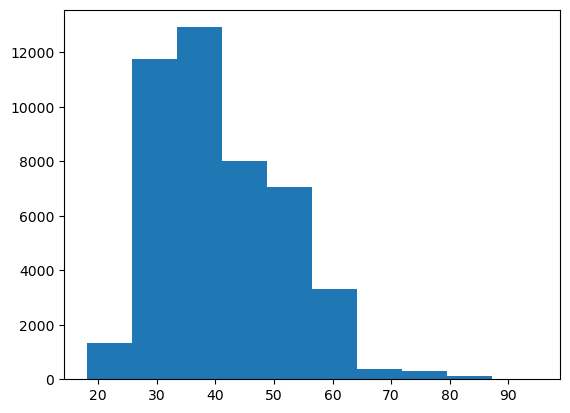

In [10]:
plt.hist(df_majeur["age"])

Text(0, 0.5, 'Effectif')

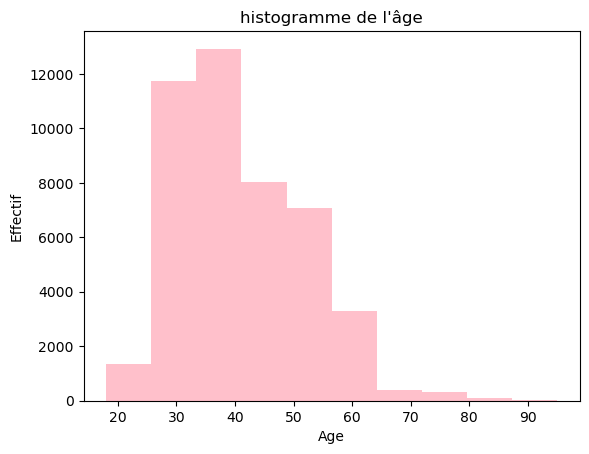

In [11]:
plt.hist(df_majeur["age"], color="pink")
plt.title("histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel("Effectif")

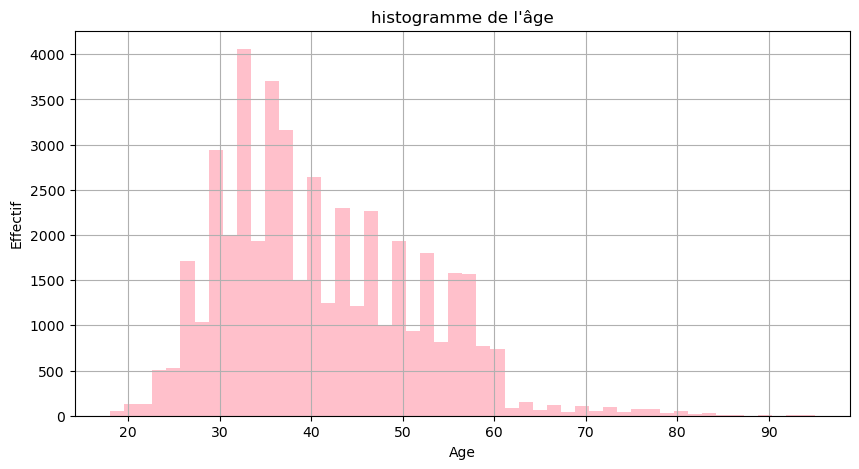

In [12]:
plt.figure(figsize=(10,5))  # Crée une figure de taille 10x5 pouces pour le graphique.

plt.hist(df_majeur["age"], color="pink", bins = 50)  # Dessine un histogramme des données de l'âge dans df_majeur. 
                                                      # Utilise la couleur rose et divise les données en 50 barres (bins).
plt.title("histogramme de l'âge")  # Ajoute un titre "histogramme de l'âge" au graphique.

plt.xlabel("Age")  # Définit "Age" comme étiquette pour l'axe des abscisses.

plt.ylabel("Effectif")  # Définit "Effectif" comme étiquette pour l'axe des ordonnées.

plt.grid()  # Ajoute une grille au graphique pour une meilleure lisibilité.

plt.show()  # Affiche le graphique à l'écran.

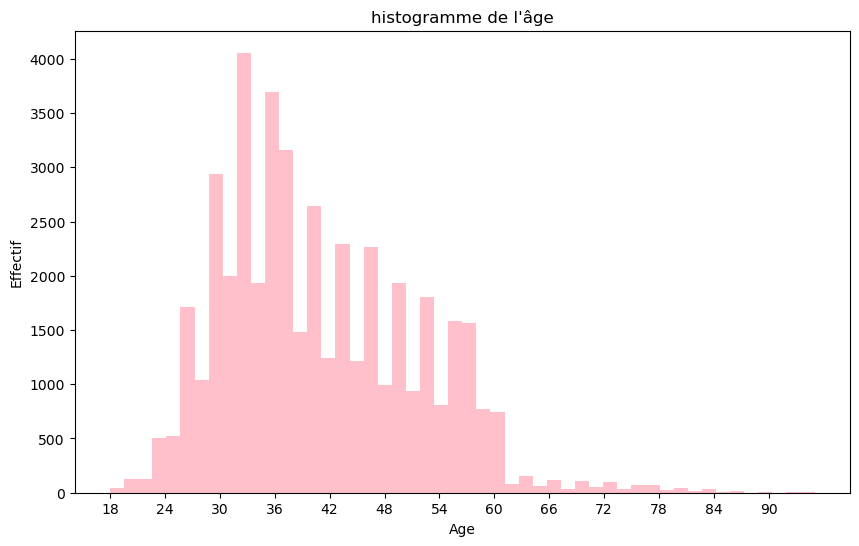

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df_majeur["age"], color="pink", bins = 50)
plt.title("histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.xticks(range(18,95,6))
plt.show()

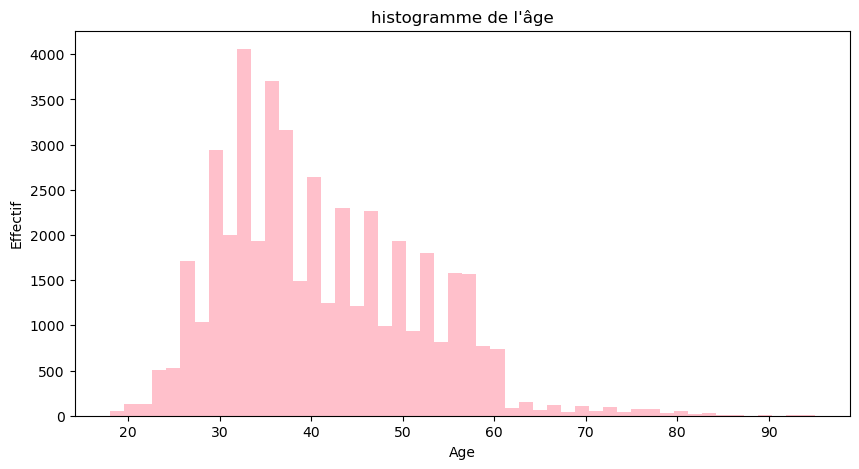

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df_majeur["age"], color="pink", bins = 50)
plt.title("histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.savefig("graphique.png")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1de9e3b5ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de9e3b60e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de9e3b5900>],
 'medians': [<matplotlib.lines.Line2D at 0x1de9e3b6620>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de9e3b68c0>],
 'means': []}

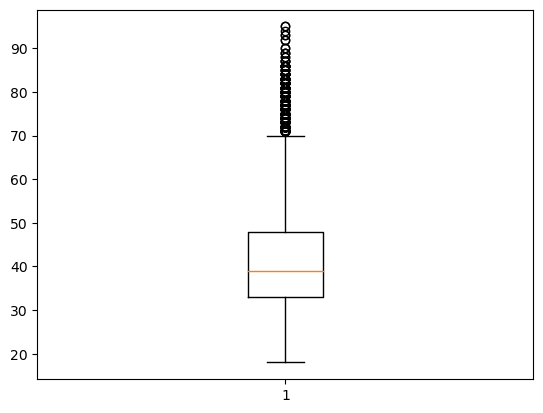

In [15]:
plt.boxplot(df_majeur["age"])

In [16]:
import seaborn as sns

Text(0.5, 1.0, 'Histogramme de la dernière communication en seconde')

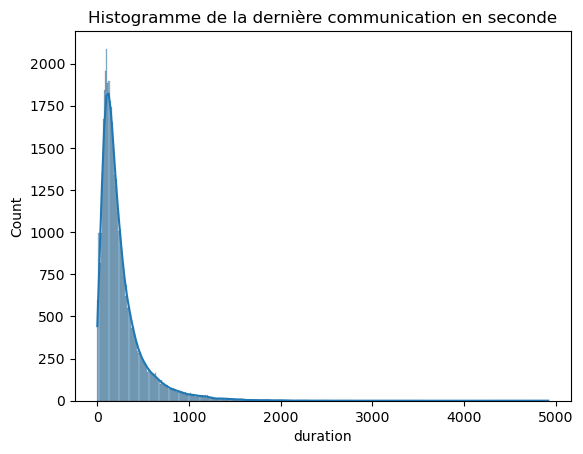

In [17]:
sns.histplot(df["duration"], kde=True)
plt.title("Histogramme de la dernière communication en seconde")

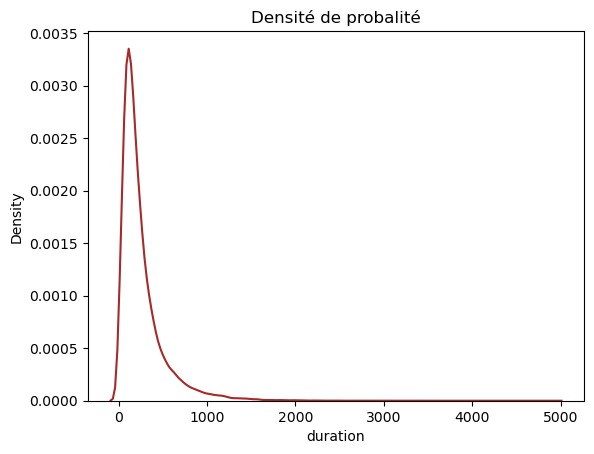

In [18]:
# courbe de densité
sns.kdeplot(df_majeur["duration"], color="brown")
plt.title("Densité de probalité")
plt.show()

# Visualisation univariée des variables qualitatives
Lors de l'analyse de variables qualitatives univariées, le choix du bon type de graphique revêt une importance cruciale pour une interprétation précise des données. Voici quelques types de graphiques couramment utilisés pour visualiser des variables qualitatives :

### Diagramme en Barres
Usage : Idéal pour représenter la fréquence ou la distribution de catégories distinctes.
Description : Le diagramme en barres utilise des barres verticales ou horizontales pour représenter la fréquence ou le pourcentage de chaque catégorie, ce qui permet de comparer visuellement les catégories entre elles.
### Diagramme en Secteurs (Camembert)
Usage : Convient pour montrer la répartition des catégories en pourcentages.
Description : Le diagramme en secteurs divise un cercle en sections proportionnelles à la fréquence de chaque catégorie, ce qui facilite la comparaison des proportions.
Ces graphiques offrent des moyens efficaces de comprendre et d'analyser les caractéristiques essentielles des variables qualitatives univariées. Ils permettent de mettre en évidence la répartition des catégories et de visualiser les différences entre elles, ce qui facilite l'interprétation des données qualitatives.

### Diagramme en barre avec matplotlib

In [19]:
effectif = df_majeur["education"].value_counts().reset_index()
type(effectif)
print(effectif)

       index  education
0  secondary      23199
1   tertiary      13298
2    primary       6849
3    unknown       1857


Text(0.5, 1.0, 'Classe des clients')

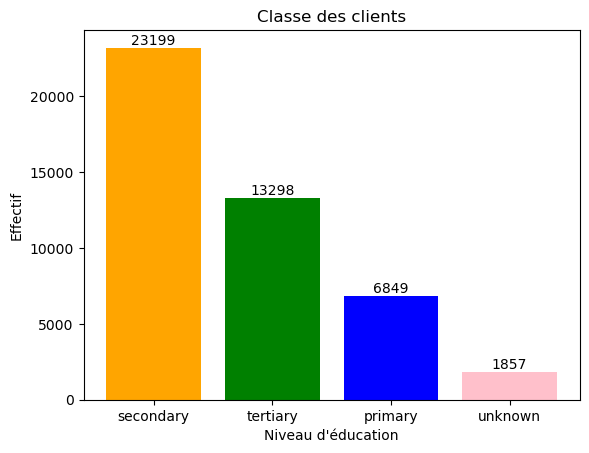

In [20]:
couleur = ["orange", "green", "blue", "pink"]
plt.bar(effectif["index"], effectif["education"], color = couleur)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["education"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")
plt.title("Classe des clients")

Text(0.5, 1.0, 'Classe des clients')

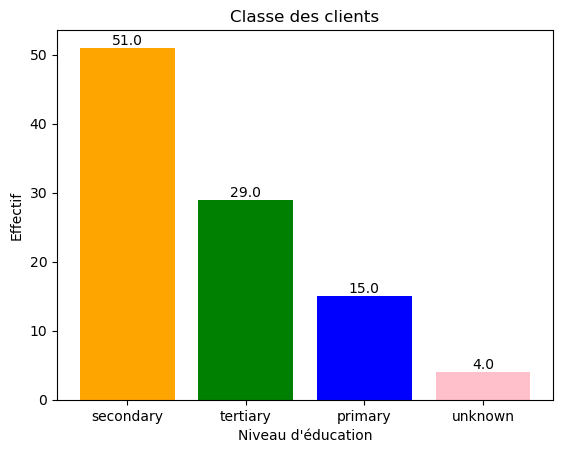

In [21]:
effectif["proportion"] = round(100*effectif["education"]/effectif["education"].sum())

# Graphique
couleur = ["orange", "green", "blue", "pink"]
plt.bar(effectif["index"], effectif["proportion"], color = couleur)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")
plt.title("Classe des clients")

([<matplotlib.patches.Wedge at 0x1dea2308910>,
 [Text(-0.045665570094656466, 1.0990517074769186, 'secondary'),
  Text(-0.5875982832524772, -0.9299076607484971, 'tertiary'),
  Text(0.8166592560480486, -0.7369312447651056, 'primary'),
  Text(1.090851553101939, -0.14157291088018178, 'unknown')],
 [Text(-0.024908492778903522, 0.5994827495328646, '51.3%'),
  Text(-0.3205081545013512, -0.5072223604082711, '29.4%'),
  Text(0.44545050329893554, -0.401962497144603, '15.2%'),
  Text(0.595009938055603, -0.07722158775282642, '4.1%')])

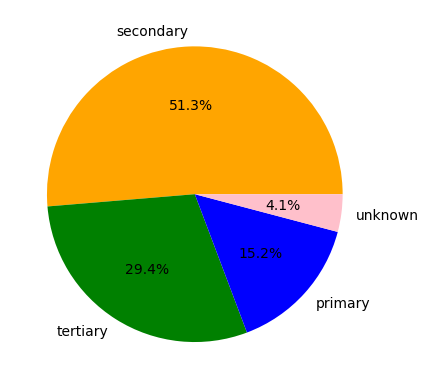

In [22]:
plt.pie(effectif["education"], labels=effectif["index"], autopct="%1.1f%%", colors=couleur)

In [23]:
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig, ax = plt.subplots()
# ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
# plt.show()

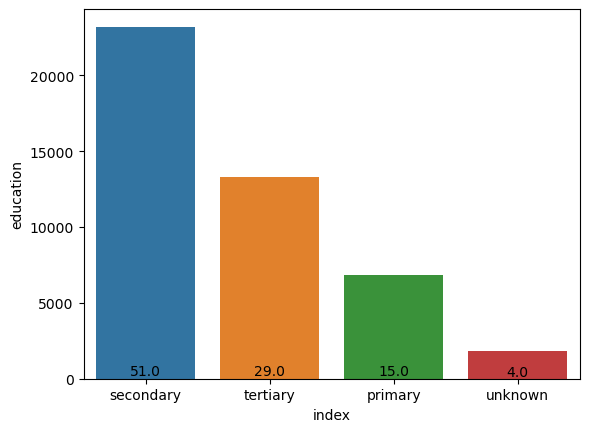

In [24]:
sns.barplot(x="index", y="education", data=effectif)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Analyse des variables qualitative vs quantitative
Pour visualiser des relations entre une variable quantitative et une variable qualitative, vous pouvez utiliser plusieurs types de graphiques en fonction de la nature de vos données. Voici trois types de graphiques bivariés adaptés à ces types de variables :

### Boxplot et Violonplot
Usage : Utile pour visualiser la distribution des valeurs quantitatives en fonction des catégories qualitatives.
Description : Les boîtes (boxplots) et les violons (violin plots) présentent la distribution des valeurs quantitatives pour chaque catégorie qualitative. Les boîtes montrent les quartiles et les médianes, tandis que les violons montrent la densité de probabilité. Cela permet de comparer la distribution des valeurs entre les catégories qualitatives.
### Barplot avec Sous-groupes (Grouped Barplot)
Usage : Idéal pour comparer des valeurs quantitatives entre différentes catégories qualitatives.
Description : Un barplot avec sous-groupes affiche des barres pour chaque catégorie qualitative, et à l'intérieur de chaque barre, il y a des sous-groupes qui représentent les valeurs quantitatives. Cela permet de comparer visuellement les valeurs quantitatives entre les catégories qualitatives.
### Boxplot entre la variable y et l'age

<Axes: xlabel='y', ylabel='duration'>

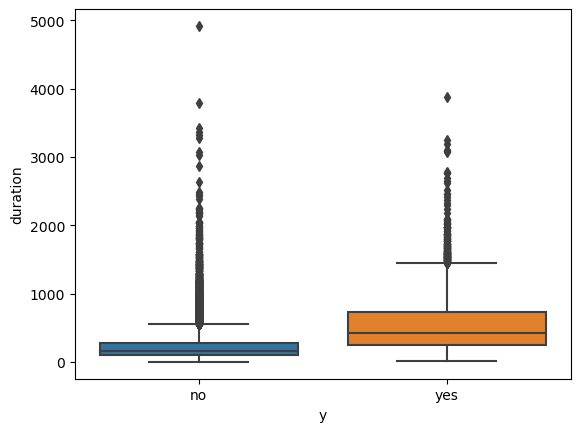

In [25]:
# expemple d'une variable
# Relation entre le fait de souscrire au dépot et la durée du prêt
sns.boxplot(x="y", y="duration", data=df_majeur)

<Axes: xlabel='y', ylabel='age'>

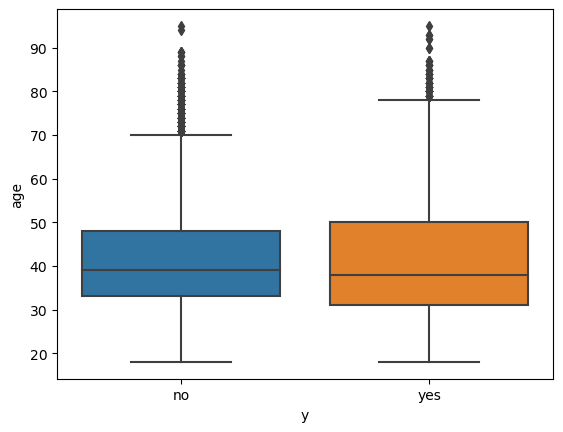

In [26]:
sns.boxplot(x="y", y="age", data=df_majeur)

<Axes: xlabel='y', ylabel='age'>

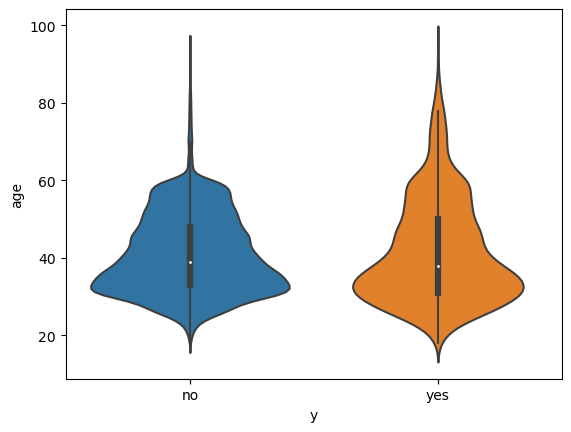

In [27]:
sns.violinplot(x="y", y="age", data=df_majeur)

# Graphique bivariée entre deux variables qualitatives
Lors de l'analyse de relations entre deux variables qualitatives, il est important de choisir les bonnes méthodes de visualisation pour comprendre les tendances et les associations. Voici deux types de graphiques bivariés adaptés à ces types de variables :

### Tableau Croisé (Contingency Table)
Usage : Idéal pour explorer les relations entre deux variables qualitatives en comptant les fréquences conjointes.
Description : Le tableau croisé affiche le nombre d'occurrences pour chaque combinaison de catégories des deux variables qualitatives. Il permet de visualiser les associations et les tendances entre les deux variables.
### Diagramme en Barres (Bar Chart)
Usage : Utile pour comparer les fréquences ou les proportions de différentes catégories d'une variable qualitative en fonction d'une autre.
Description : Le diagramme en barres affiche des barres verticales ou horizontales pour chaque catégorie de la variable qualitative étudiée. Cela permet de comparer visuellement les fréquences ou les proportions des catégories par rapport à une autre variable qualitative.

In [28]:
table_contingence = pd.crosstab(df_majeur["y"], df_majeur["education"])
table_contingence

education,primary,secondary,tertiary,unknown
y,,,,
no,6258,20749,11302,1605
yes,591,2450,1996,252


<Axes: xlabel='y', ylabel='count'>

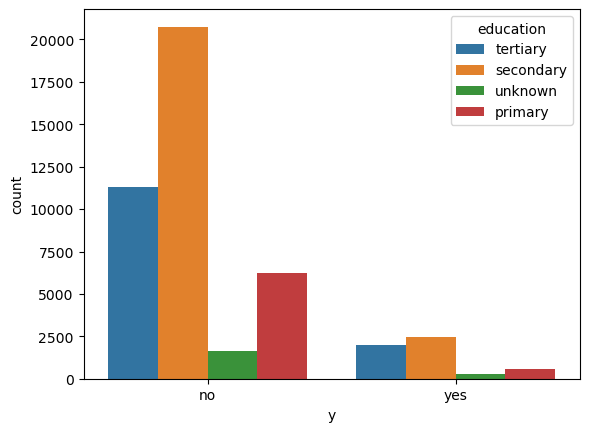

In [29]:
sns.countplot(x="y", hue="education", data=df)

In [30]:
prop_table = df_majeur.groupby("y")["education"].value_counts(normalize=True).reset_index(name="proportion")
prop_table

,y,education,proportion
0,no,secondary,0.519843
1,no,tertiary,0.283159
2,no,primary,0.156787
3,no,unknown,0.040211
4,yes,secondary,0.463226
5,yes,tertiary,0.377387
6,yes,primary,0.111741
7,yes,unknown,0.047646


<Axes: xlabel='y', ylabel='proportion'>

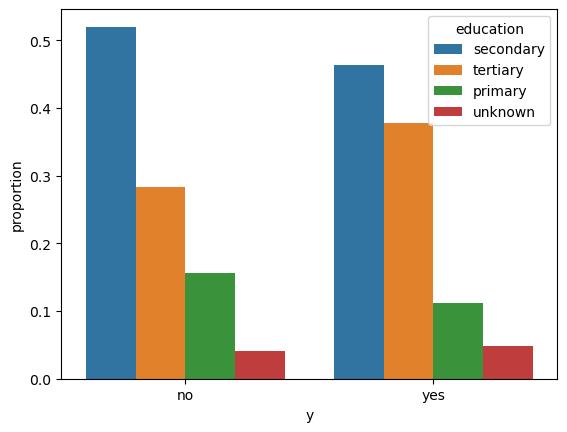

In [31]:
sns.barplot(x="y", y="proportion", hue="education", data=prop_table)

# Analyse bivariée entre les variables quantitatives
Lors de l'analyse des relations entre deux variables quantitatives, il est essentiel de choisir les outils de visualisation appropriés pour comprendre la corrélation et les tendances. Voici deux types de graphiques adaptés à ces types de relations :

### Scatterplot (Nuage de Points)
Usage : Idéal pour visualiser la relation entre deux variables quantitatives continues.
Description : Le scatterplot affiche les points de données individuels dans un espace bidimensionnel, où chaque axe représente l'une des variables quantitatives. Il permet de visualiser la répartition des points et d'identifier des tendances, des modèles ou des corrélations entre les deux variables. Une corrélation positive est indiquée lorsque les points se déplacent dans la même direction, tandis qu'une corrélation négative est indiquée lorsque les points se déplacent dans des directions opposées.
### Heatmap de Corrélation
Usage : Utile pour quantifier et visualiser la corrélation entre plusieurs paires de variables quantitatives.
Description : La heatmap de corrélation est un graphique matriciel qui attribue des couleurs aux coefficients de corrélation entre les paires de variables quantitatives. Elle permet de quantifier la force et la direction de la corrélation entre les variables. Les valeurs proches de 1 indiquent une corrélation positive forte, tandis que les valeurs proches de -1 indiquent une corrélation négative forte. Une valeur proche de 0 indique une faible corrélation.
Ces graphiques offrent des moyens puissants d'explorer et d'analyser les relations entre deux variables quantitatives. Le scatterplot permet une visualisation directe des données brutes, tandis que la heatmap de corrélation permet d'obtenir une vue d'ensemble de la corrélation entre plusieurs paires de variables.

N'hésitez pas à utiliser ces outils pour mieux comprendre les relations entre vos variables quantitatives et à les adapter en fonction de vos besoins d'analyse.

Text(0, 0.5, 'Age')

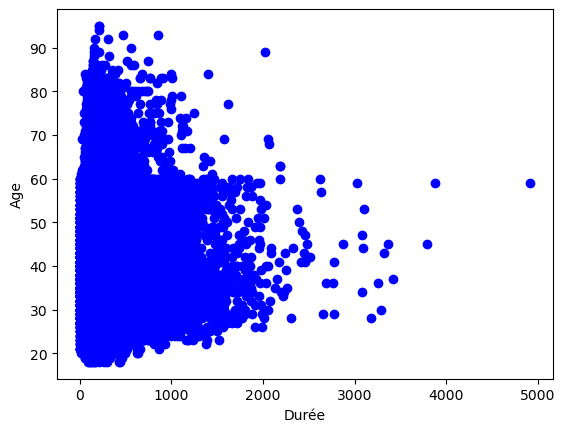

In [32]:
plt.scatter(df_majeur["duration"], df_majeur["age"], c="blue")
plt.xlabel("Durée")
plt.ylabel("Age")

<Axes: xlabel='duration', ylabel='age'>

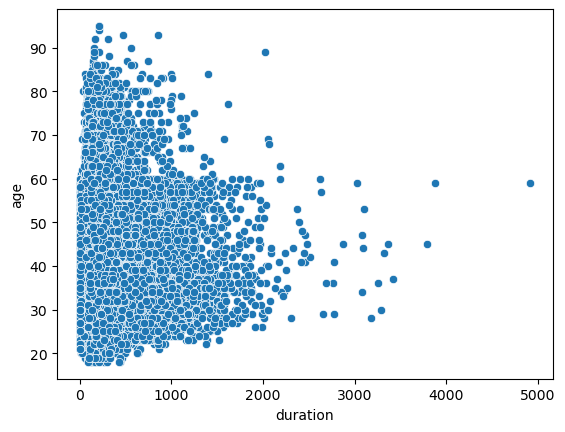

In [33]:
sns.scatterplot(x="duration", y="age", data=df_majeur)

In [34]:
var_quantitative = ["age", "balance", "duration", "campaign", "pdays", "previous"]
df_quanti = df_majeur[var_quantitative]
df_quanti

,age,balance,duration,campaign,pdays,previous
0,58,2143.0,261,1,-1,0
1,44,29.0,151,1,-1,0
2,33,2.0,76,1,-1,0
3,47,1506.0,92,1,-1,0
4,33,1.0,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825.0,977,3,-1,0
45207,71,1729.0,456,2,-1,0
45208,72,5715.0,1127,5,184,3
45209,57,668.0,508,4,-1,0


In [35]:
matrice_correlation = df_quanti.corr()
matrice_correlation

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097827,-0.004639,0.004765,-0.023758,0.001290
balance,0.097827,1.000000,0.021557,-0.014647,0.003387,0.016644
duration,-0.004639,0.021557,1.000000,-0.084585,-0.001574,0.001197
campaign,0.004765,-0.014647,-0.084585,1.000000,-0.088673,-0.032882
pdays,-0.023758,0.003387,-0.001574,-0.088673,1.000000,0.454811
previous,0.001290,0.016644,0.001197,-0.032882,0.454811,1.000000


<Axes: >

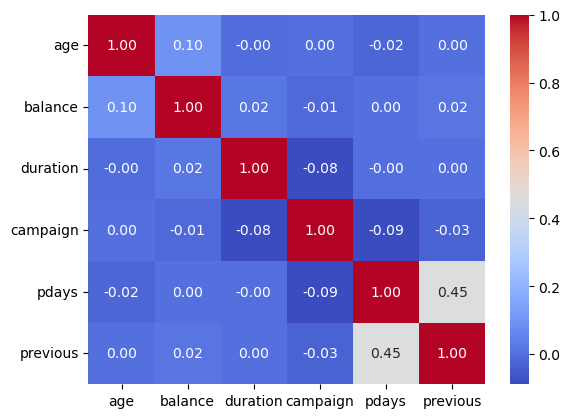

In [36]:
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f")

In [37]:
df_majeur.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

# Pairplot pour les liaisons rapides

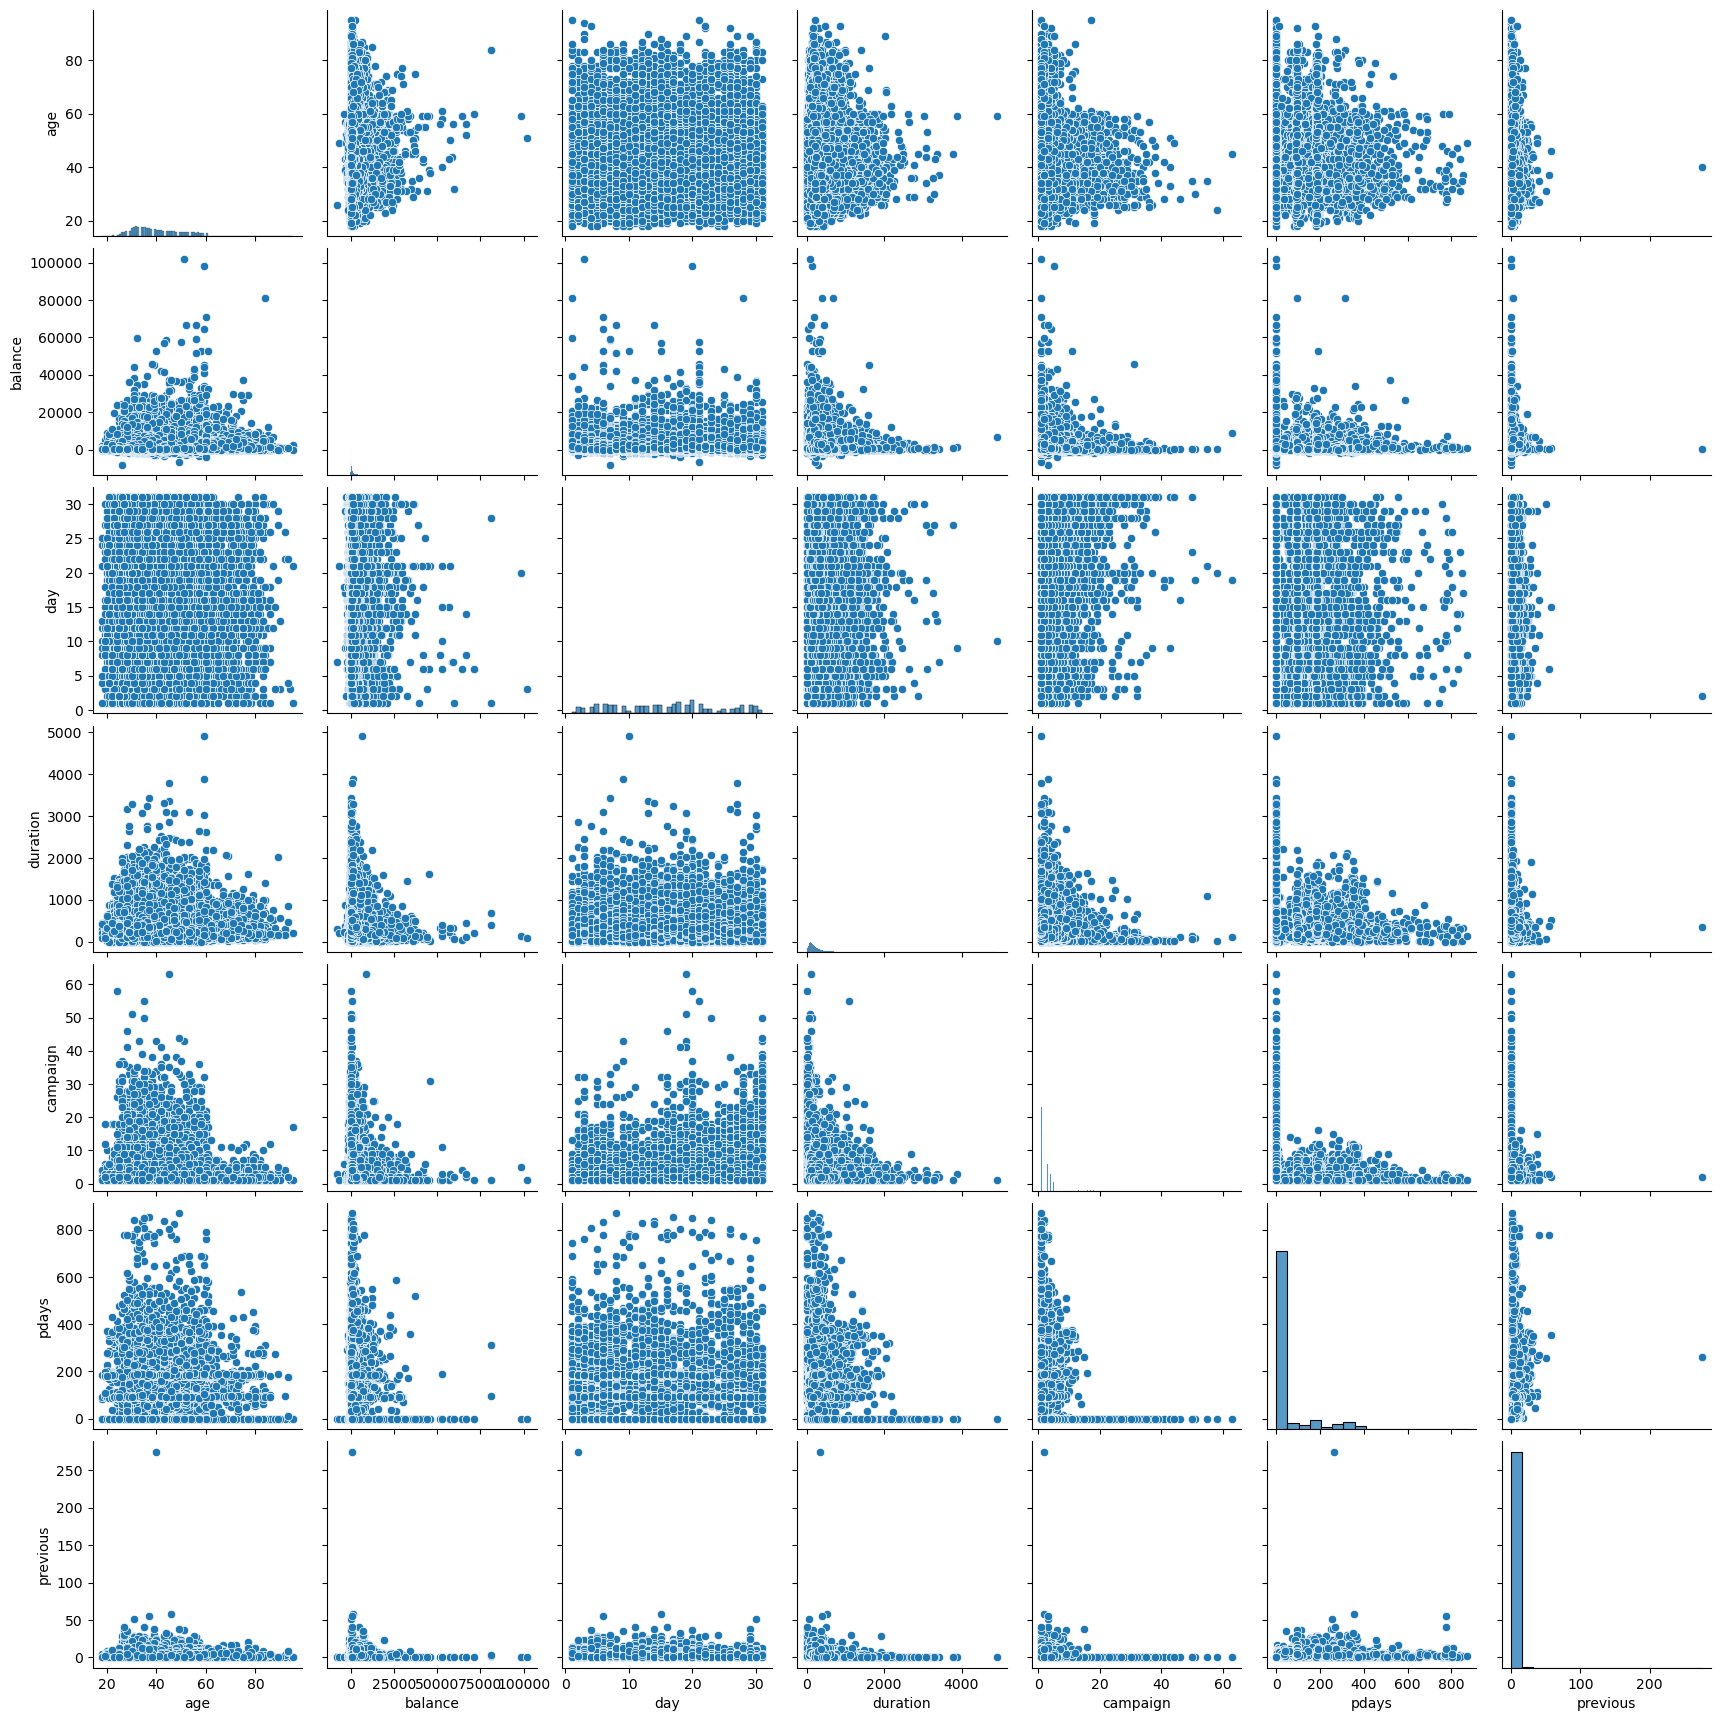

In [38]:
sns.pairplot(df_majeur)

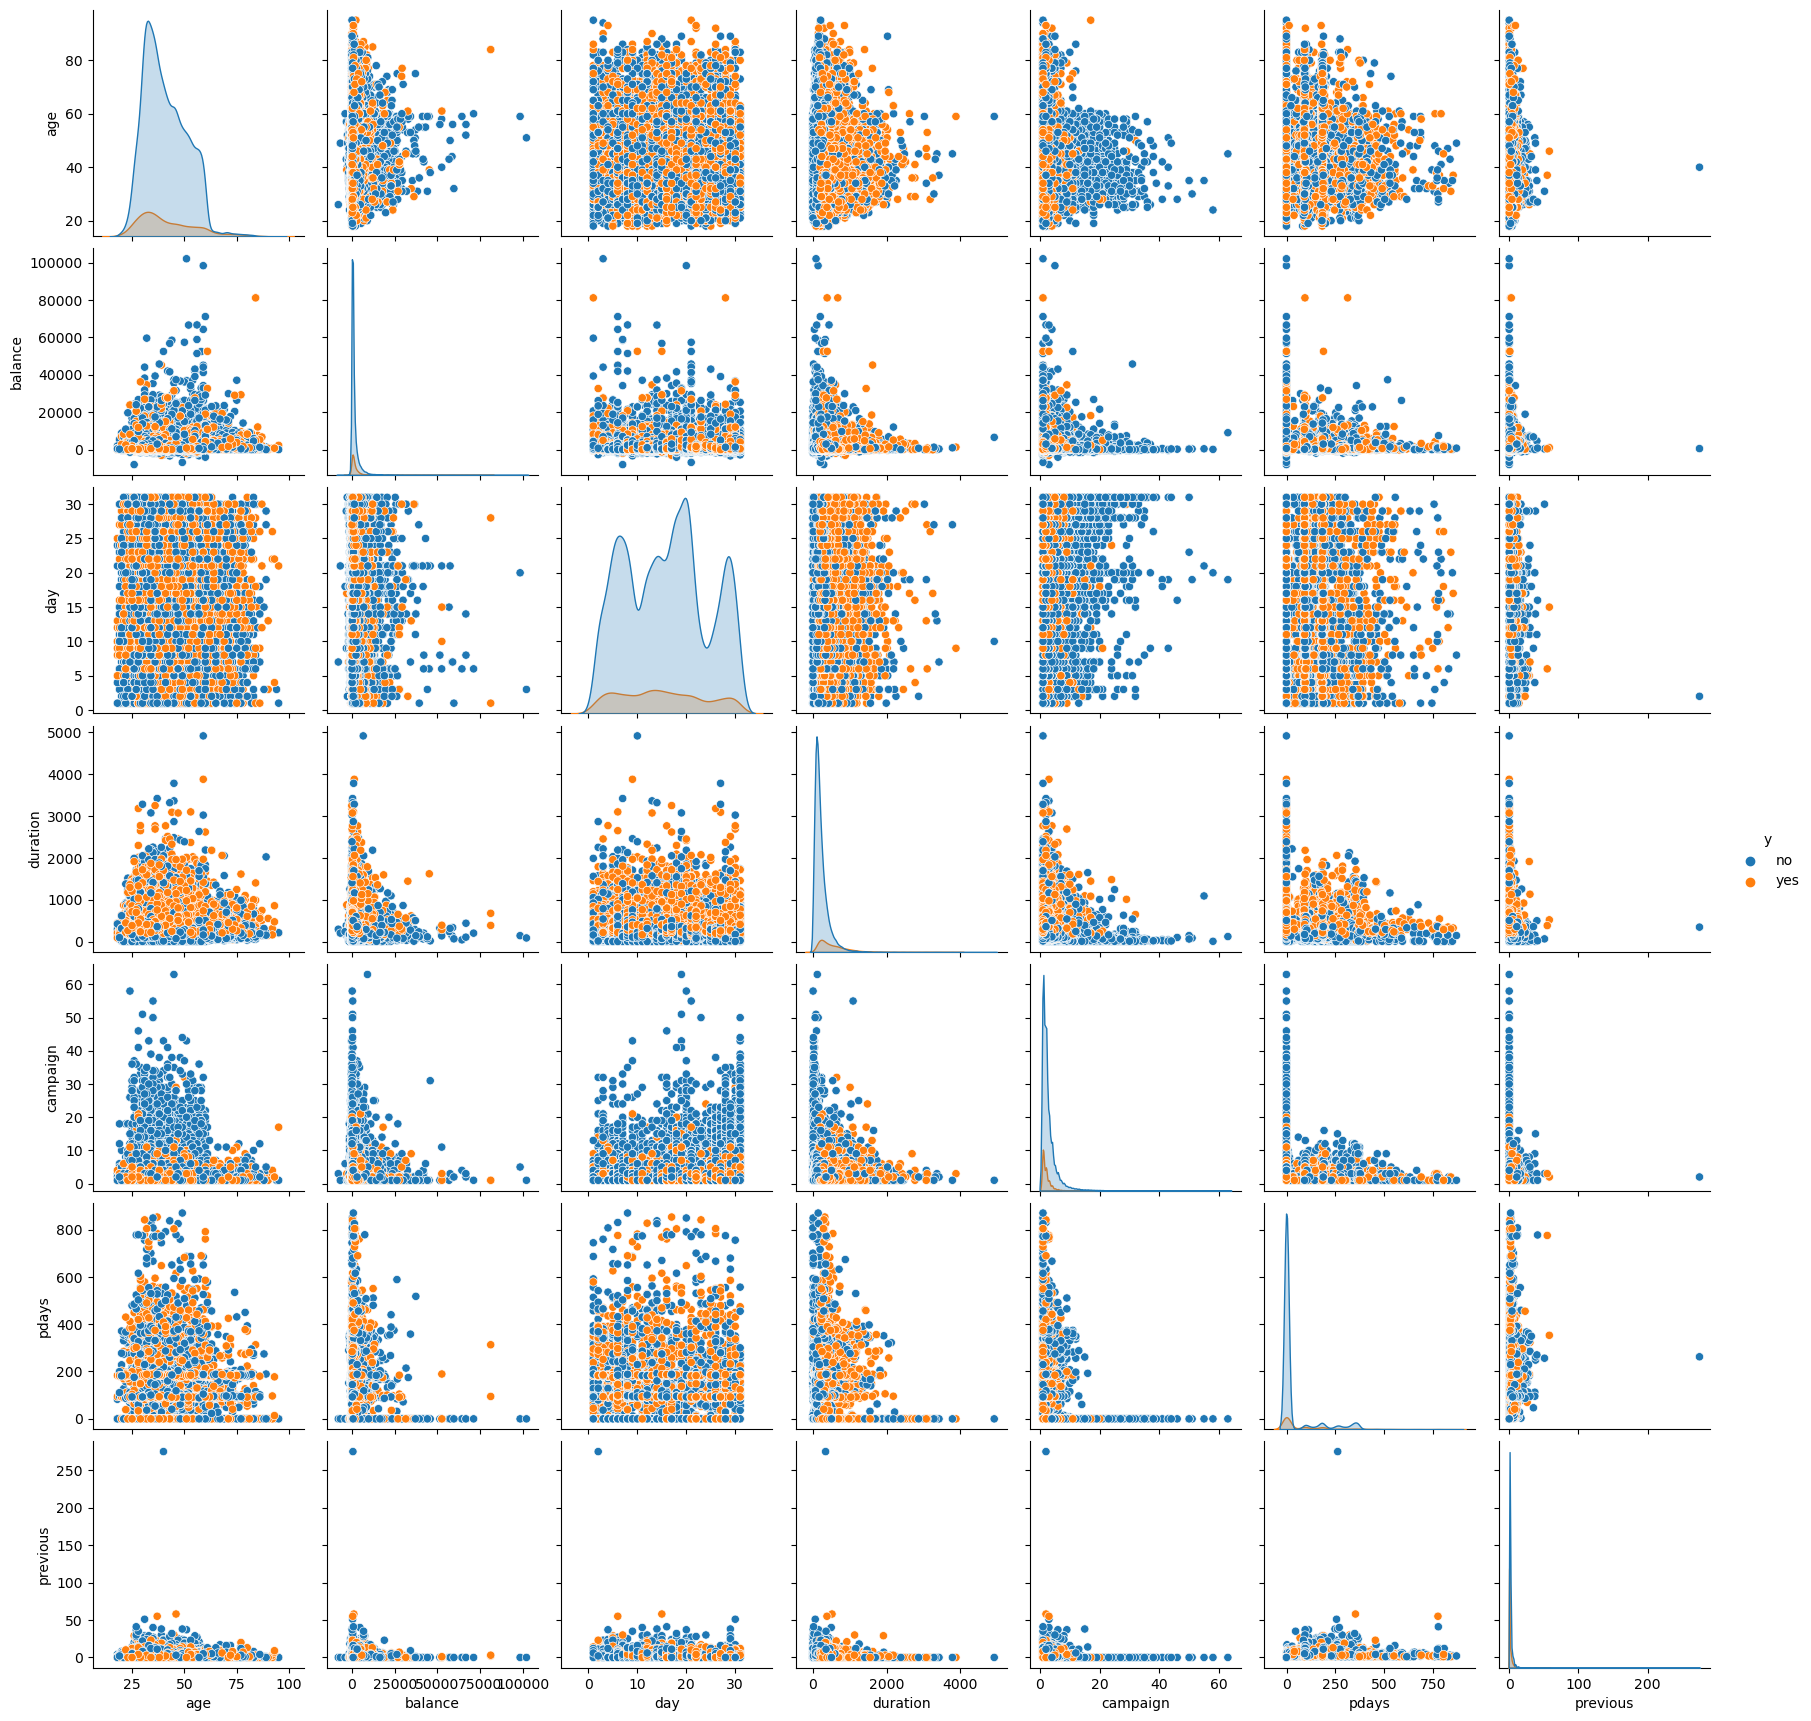

In [39]:
sns.pairplot(df_majeur, hue="y")

# Découvrir plotly
Découvrir plotly en cliquant sur le lien suivant https://plotly.com/

In [41]:
import plotly.express as px
import pandas as pd
import numpy as np

# Créez un dataframe avec des données de série temporelle fictives
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = {
    'Date': date_rng,
    'Valeur': np.random.randn(len(date_rng))
}
df = pd.DataFrame(data)

# Créez un graphique de série temporelle avec Plotly Express
fig = px.line(df, x='Date', y='Valeur', title='Série temporelle')

# Affichez le graphique interactif
fig.show()